<a href="https://colab.research.google.com/github/sam1610/Inference_DIRinfo/blob/master/7_7_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Environment prepartion & libraries installation

In [1]:
! pip  install -U   scikit-learn  random_timestamp ipywidgets plotly

     |████████████████████████████████| 22.3 MB 62.7 MB/s 
     |████████████████████████████████| 20.6 MB 1.4 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [2]:
import pandas as pd
import numpy as np
import random
import string
from random import randint
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls  /content/drive/MyDrive/portalAnalysis/

Data  TimeSeriesAnalysisWithPython


In [ ]:
cd /content/drive/MyDrive/portalAnalysis/

/content/drive/.shortcut-targets-by-id/1ZqnixmkqoSThWVJbij6rwHF3MnJGRihq/portalAnalysis


## Load General-Students-Info.csv   (( df_st ))

In [ ]:
df_st=pd.read_csv("./Data/General-Students-Info.csv", index_col=0)

## Load Student's Portal Achievments (( df_avt ))

In [ ]:
df_avt=pd.read_csv("./Data/Portal-Achiev-Info.csv", index_col=0)

## Load the dataset that has 5 selected students Info (( dt_st ))

In [ ]:
dt_st=pd.read_csv("./Data/5_students-Info.csv", index_col=0)

In [ ]:
dt_st.set_index("Act_submit_Time", inplace=True)

In [ ]:
dt_st["Act_submit_Time"]= pd.to_datetime(dt_st.Act_submit_Time)

In [ ]:
dt_st.set_index("Act_submit_Time", inplace=True)

In [ ]:
dt_st = dt_st.drop(['Unnamed: 0'], axis = 1)

In [ ]:
dt_st.head()

,student_ID,Course_code,Activity_id,Activity_type,Unit_id,Chapter_id,Lesson_id,Act_diff,Act_cp_count,Act_time,Act_mark
Act_submit_Time,,,,,,,,,,,
2020-04-25 14:38:39,080634978S,g7_1,g7_1-Act_6,0,Un_4,Chp_7,Ls_7,4,1,694,6.94
2020-04-23 16:42:24,080634978S,g7_1,g7_1-Act_10,0,Un_6,Chp_0,Ls_8,3,1,401,7.70
2020-02-19 23:02:47,080634978S,g7_1,g7_1-Act_5,0,Un_6,Chp_3,Ls_0,4,2,451,2.42
2020-07-10 13:26:51,080634978S,g7_1,g7_1-Act_5,0,Un_2,Chp_0,Ls_7,1,1,256,7.51
2020-03-28 11:26:27,080634978S,g7_1,g7_1-Act_6,0,Un_5,Chp_5,Ls_7,2,1,772,7.22


## I) Create Student's General Info. Dataset

In [4]:
####   تحديد الصف الذي ينتمي اليه مواليد كل سنة

grades={
    "06":"9","07":"8",
    "08":"7", "09":"6", "10":"5", "11":"4",
    "12":"3", "13":"2", "14":"1"
}

In [5]:
###  الطلبة العينة من 10 مدارس عشوائيًا (500 طالب) ##
##### من الصف السادس الى الثالث الاعدادي 


list_std=[]
for i in range(500):
  birth_year=random.choice(["06", "07", "08", "09","10"]) 
  student= {
  "student_id": ''.join(random.choice(string.digits) for _ in range(5)) ,
  "birth_year": birth_year,
  "birth_month": random.choice(["01", "02", "03", "04", "05", 
                                "06", "07", "08", "09","10","11","12"]),
  "school": random.choice([ "Sc_"+str(j) for j in range(10)]),
  "grade": grades[birth_year],  
  "gender": random.choice(["M", "F"]),
  "governorate": random.choice(["North", "South", "Caiptal", "Muharraq"])
         } 
  list_std.append(student)
  
      
df_st=pd.DataFrame(list_std)


In [6]:
df_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   student_id   500 non-null    object
 1   birth_year   500 non-null    object
 2   birth_month  500 non-null    object
 3   school       500 non-null    object
 4   grade        500 non-null    object
 5   gender       500 non-null    object
 6   governorate  500 non-null    object
dtypes: object(7)
memory usage: 27.5+ KB


In [7]:

df_st.head()

,student_id,birth_year,birth_month,school,grade,gender,governorate
0,77232,07,08,Sc_0,8,F,North
1,71556,07,09,Sc_2,8,F,Muharraq
2,95032,09,05,Sc_7,6,M,Caiptal
3,09663,10,09,Sc_7,5,M,Caiptal
4,49526,09,03,Sc_4,6,M,South


In [8]:
df_st[:-1].values.T

array([['77232', '71556', '95032', ..., '99564', '80151', '97195'],
       ['07', '07', '09', ..., '09', '09', '10'],
       ['08', '09', '05', ..., '03', '08', '05'],
       ...,
       ['8', '8', '6', ..., '6', '6', '5'],
       ['F', 'F', 'M', ..., 'M', 'M', 'F'],
       ['North', 'Muharraq', 'Caiptal', ..., 'Caiptal', 'South',
        'Caiptal']], dtype=object)

In [9]:
#####  Merge student_ID with birth year and month month to get a complete CPR

df_st.insert(0, 'student_ID', df_st['birth_year'].astype(str) + df_st['birth_month'].astype(str)+df_st.pop('student_id').astype(str))

In [10]:
df_st.head()

,student_ID,birth_year,birth_month,school,grade,gender,governorate
0,070877232,07,08,Sc_0,8,F,North
1,070971556,07,09,Sc_2,8,F,Muharraq
2,090595032,09,05,Sc_7,6,M,Caiptal
3,100909663,10,09,Sc_7,5,M,Caiptal
4,090349526,09,03,Sc_4,6,M,South


In [11]:
for col in df_st.keys():
  df_st[col]= df_st[col].astype(str)

In [ ]:
df_st.to_csv("./Data/General-Students-Info.csv")

## II) Create Students' portal activity Dataset

In [12]:
from random_timestamp import random_timestamp
lst=[]
for i, k  in zip(df_st.student_ID, df_st.grade):
  for j in range (14, int((20*np.random.rand()+8))):
    course_id=random.choice(["g"+str(k)+"_"+str(l) for l in range(1,4)])
    ActType=random.choice(["1", "0" ])
    activities= {
        "student_ID": i ,
        "Course_code":course_id,  
        "Activity_id": f"{course_id}-Act_{int(20*np.random.rand()+1)}",
        "Activity_type":ActType,
        # "Act_count": course_ref[course_id][ActType] , #np.random.randint(5,30),

      "Unit_id":  random.choice([ "Un_"+str(k) for k in range(10)]),
      "Chapter_id": random.choice([ "Chp_"+str(k) for k in range(10)]), 
      "Lesson_id": random.choice([ "Ls_"+str(k) for k in range(10)]),
      # "Competence-id":  random.choice([ "Cp_"+str(k) for k in range(10)]), 
      "Act_diff":  int((4*np.random.rand(1)+1)),
      "Act_cp_count": int((np.random.rand(1)*2+1)), 

      "Act_time": int((870*np.random.rand()+30)) , ####### from 30 SEC to 15 MIN
      "Act_submit_Time": random_timestamp( year=2020),
      #  add  afeature for  late submission
      "Act_mark": int((1000*np.random.rand()))/100,
    }
    lst.append(activities)
df_avt=pd.DataFrame(lst)

In [13]:
df_avt.head()

,student_ID,Course_code,Activity_id,Activity_type,Unit_id,Chapter_id,Lesson_id,Act_diff,Act_cp_count,Act_time,Act_submit_Time,Act_mark
0,070877232,g8_2,g8_2-Act_7,1,Un_0,Chp_0,Ls_8,1,2,884,2020-05-08 23:04:08,9.03
1,070877232,g8_1,g8_1-Act_3,0,Un_8,Chp_6,Ls_3,2,2,774,2020-01-25 18:47:49,4.44
2,070877232,g8_1,g8_1-Act_6,1,Un_1,Chp_2,Ls_3,4,2,264,2020-06-09 17:32:30,9.26
3,070877232,g8_3,g8_3-Act_16,0,Un_6,Chp_4,Ls_4,3,2,156,2020-07-23 04:50:00,5.86
4,070877232,g8_3,g8_3-Act_11,0,Un_7,Chp_0,Ls_4,2,1,125,2020-12-08 07:59:27,0.03


In [14]:
#######   Below Trails ONLY

In [15]:
std="100237271"
cs="g5_1"
df_avt["Act_submit_Time"]=df_avt["Act_submit_Time"].astype(str)
dt_tmp= df_avt.query(f"student_ID=='{std}' & Course_code=='{cs}' & Activity_type=='0'")[["Act_mark", "Activity_id","Act_submit_Time" ]]
dt_tmp["Act_submit_Time"]=pd.to_datetime(dt_tmp.Act_submit_Time, format="%Y-%m-%d")
dt_tmp.sort_values(by= "Act_submit_Time", inplace=True)
# dt_tmp["Act_submit_Time"]= dt_tmp.Act_submit_Time.astype("category")
# Actual Student ACtivities
dt_tmp

,Act_mark,Activity_id,Act_submit_Time


In [ ]:
# All Students having the same Activity as ABove
df_stAct=pd.DataFrame()

for col, time in zip(
    dt_tmp["Activity_id"],
    dt_tmp.Act_submit_Time.unique()):
  df_bx=pd.DataFrame()
  df_bx=df_avt.query(f"Activity_id== '{col}' & Activity_type=='0'")[["Activity_id", "Act_mark"]]
  df_bx["Act_submit_Time"]= pd.to_datetime(time).strftime("%Y-%m-%d")
  df_stAct= pd.concat([
                       df_stAct, df_bx
  ])
df_stAct.sort_values(by="Act_submit_Time", inplace=True)
df_stAct["Act_submit_Time"]= df_stAct.Act_submit_Time.astype("category")
df_stAct

In [ ]:
#Combine Graph
import seaborn as sns 
import matplotlib.pyplot as plt

fg, ax= plt.subplots( figsize=(10,7))


sns.boxplot(x="Activity_id" ,  y= "Act_mark", data=df_stAct , ax=ax )
sns.lineplot(
    x="Activity_id",
    y= "Act_mark", 
    data=dt_tmp  , ax=ax )
ax.set_xticklabels(dt_tmp.Act_submit_Time.unique())
plt.show()

In [ ]:
import datetime

today = datetime.date.today()
print(today.strftime("%Y-%m-%d")) 

2021-07-12


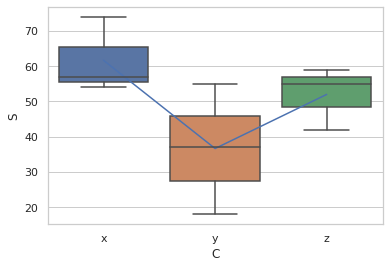

In [ ]:
import numpy as np 
import random
dfx=pd.DataFrame({"S": np.random.randint(1,100, 9), "C":["x", "x", "y", "x", "y", "y", "z", "z", "z"]})


fig,  ax=  plt.subplots()

mx=dfx.groupby("C").S.mean()
sns.boxplot(data= dfx, x= "C", y="S", ax=ax)
sns.lineplot(y=mx.values, x=mx.index, ax=ax)

In [ ]:
df_avt.to_csv("./Data/Portal-Achiev-Info.csv")

## III) Generate 5 selected Students Data to graph  


In [18]:
def dataJson(actType, i , c):
  return {
          "student_ID": i ,
          "Course_code":c,  
          "Activity_id": f"{c}-Act_{int(10*np.random.rand()+1)}",
          "Activity_type":actType,
          

        "Unit_id":  random.choice([ "Un_"+str(k) for k in range(10)]),
        "Chapter_id": random.choice([ "Chp_"+str(k) for k in range(10)]), 
        "Lesson_id": random.choice([ "Ls_"+str(k) for k in range(10)]),
        "Act_diff":  int((4*np.random.rand(1)+1)),
        "Act_cp_count": int((np.random.rand(1)*2+1)), 

        "Act_time": int((870*np.random.rand()+30)) , ####### from 30 SEC to 15 MIN
        "Act_submit_Time": random_timestamp( year=2020),
        #  add  a feature for  late submission
        "Act_mark": int((1000*np.random.rand()))/100,
      }

In [19]:
std_course=[['g5_3', 'g5_2', 'g5_1'], ['g9_3', 'g9_1', 'g9_2'],['g6_1', 'g6_3',
       'g6_2'], ['g8_1', 'g8_3', 'g8_2'], ['g7_1',  'g7_3', 'g7_2'] ]

In [20]:
from random_timestamp import random_timestamp
lst=[]
std_array= df_avt.student_ID.unique()[:5] +"S"
for i , course in zip(std_array, std_course):# c in df_avt.Course_code.unique():
  for c in course:
    for j in range (1, int((2*np.random.rand()+8))):
      # course_id= c random.choice(["g"+str(k)+"_"+str(l) for l in range(1,7)])
      lst.append(dataJson("0", i , c))
    for j in range (1, int((2*np.random.rand()+4))):
      # course_id= c random.choice(["g"+str(k)+"_"+str(l) for l in range(1,7)])
      lst.append(dataJson("1", i , c))
     
dt_st=pd.DataFrame(lst)

In [21]:
# for s, c  in  zip(dt_st.student_ID.unique(), std_course[0]):
#   count=dt_st.query(f"student_ID=='{s}' & Course_code=='{c}' & Activity_type=='1'").shape[0]
#   print(f"Student:  {s}  has: {count}  records")

In [22]:
dt_st.Course_code.unique()

array(['g5_3', 'g5_2', 'g5_1', 'g9_3', 'g9_1', 'g9_2', 'g6_1', 'g6_3',
       'g6_2', 'g8_1', 'g8_3', 'g8_2', 'g7_1', 'g7_3', 'g7_2'],
      dtype=object)

In [23]:
dt_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   student_ID       162 non-null    object        
 1   Course_code      162 non-null    object        
 2   Activity_id      162 non-null    object        
 3   Activity_type    162 non-null    object        
 4   Unit_id          162 non-null    object        
 5   Chapter_id       162 non-null    object        
 6   Lesson_id        162 non-null    object        
 7   Act_diff         162 non-null    int64         
 8   Act_cp_count     162 non-null    int64         
 9   Act_time         162 non-null    int64         
 10  Act_submit_Time  162 non-null    datetime64[ns]
 11  Act_mark         162 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 15.3+ KB


In [ ]:
dt_st.to_csv("./Data/5_students-Info.csv")

## IV) Graph the selected student's Quizzes and Assignmens Marks


In [24]:
dt_st.sample(5)

,student_ID,Course_code,Activity_id,Activity_type,Unit_id,Chapter_id,Lesson_id,Act_diff,Act_cp_count,Act_time,Act_submit_Time,Act_mark
154,070270034S,g7_2,g7_2-Act_9,0,Un_5,Chp_3,Ls_2,2,1,857,2020-05-03 04:07:33,1.51
149,070270034S,g7_3,g7_3-Act_4,1,Un_8,Chp_1,Ls_1,3,2,351,2020-01-24 19:40:24,7.68
45,090595032S,g9_1,g9_1-Act_4,0,Un_0,Chp_7,Ls_7,2,1,301,2020-02-09 12:06:55,2.46
95,100909663S,g6_2,g6_2-Act_3,1,Un_3,Chp_2,Ls_3,4,1,88,2020-06-06 12:22:53,1.95
30,070877232S,g5_1,g5_1-Act_7,1,Un_4,Chp_6,Ls_9,2,2,179,2020-08-02 08:23:56,9.33


In [25]:
dup=["student_ID","Course_code", "Activity_id", "Activity_type"]

In [26]:
import ipywidgets as widgets 
from ipywidgets import interact
from matplotlib.dates import DateFormatter

In [27]:
std_d={}
for st in  dt_st.student_ID.unique():
  std_d[st]=dt_st[dt_st.student_ID==st]["Course_code"].unique()

In [28]:
std_d

{'070270034S': array(['g7_1', 'g7_3', 'g7_2'], dtype=object),
 '070877232S': array(['g5_3', 'g5_2', 'g5_1'], dtype=object),
 '090349526S': array(['g8_1', 'g8_3', 'g8_2'], dtype=object),
 '090595032S': array(['g9_3', 'g9_1', 'g9_2'], dtype=object),
 '100909663S': array(['g6_1', 'g6_3', 'g6_2'], dtype=object)}

In [29]:
from ipywidgets import interact, Dropdown, Checkbox

stID = Dropdown(options = std_d.keys())
course = Dropdown(options = std_d[stID.value]) # options = std_d[stID.value] is to remove inital error but not that necessary.
box = Checkbox(False, description='Quizz/Assignment')


@interact(st = stID, cs = course, chkbx= box)
def print_cs(st, cs,chkbx ):
    course.options = std_d[st] # Here is the trick, i.e. update course.options based on st, namely stID.value.
    # print(st, cs)
    dt_st.query(f"Course_code=='{cs}' & student_ID=='{st}'")



interactive(children=(Dropdown(description='st', options=('070877232S', '090595032S', '100909663S', '090349526…

In [30]:
#vrst='070574257S'


std_d={}
for st in  dt_st.student_ID.unique():
  std_d[st]=dt_st[dt_st.student_ID==st]["Course_code"].unique()
  #vrst=st
  # list(df_recommend.query(f"student_ID=='{st}'").lobj_id.unique())

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
#  Json  recommendation Initialization
modules=[
         {"unit":"Data and statistics", 
          "lessons":[
                    {"LessName": "Dot plots & frequency tables",
                    "lobs":[
                            {"lobID": 1, "lobName":"Representing Data", "URL":, "URL": "https://" },
                            {"lobID": 2,"lobName":"Frequency Tables & dot plot", "URL": "https://"}
                          ]
                          
                    },
                    {"LessName": "Statistical questions",
                    "lobs":[
                            {"lobID": 3, "lobName":"Statistical questions", "URL": "https://"}
                          ]
                    },
                    {"LessName": "Histograms",
                    "lobs":[
                            {"lobID": 4, "lobName":"Creating a histogram", "URL": "https://"},
                            {"lobID": 5, "lobName":"Interpreting a histogram", "URL": "https://"}
                          ]
                    },
                    {"LessName": "Mean and median",
                    "lobs":[
                            
                                {"lobID": 6, "lobName":"Statistics Intro: Mean, Median & Mode", "URL": "https://"}, 
                                {"lobID": 7, "lobName":"Mean, Median & Mode example", "URL": "https://"},
                                {"lobID": 8 , "lobName":"Calculating the mean", "URL": "https://"}
                                
                                
                          ]
                    },
                    {"LessName": "Mean and median challenge problems",
                    "lobs":[
                             {"lobID": 9, "lobName": "Missing value given the mean", "URL": "https://"},
                              {"lobID":10 , "lobName":"Mean as the balancing point"},
                              {"lobID": 11, "lobName":"Impact on median & mean: Removing an outlier"},
                              {"lobID": 12, "lobName":"Impact on median & mean: increasing an outlier"},
                              {"lobID": 13, "lobName":"Median & range puzzlers"}
                          ]
                    },
                    {"LessName": "Interquartile range (IQR)",
                    "lobs":[
                            {"lobID": 14, "lobName":"Interquartile range (IQR)"}
                          ]
                    },
                    {"LessName": "Box Plots",
                    "lobs":[
                            {"lobID":15  , "lobName":"Reading box plots"},
                             {"lobID":16  , "lobName":"Constructing a box plot"},
                             {"lobID":17  , "lobName":"Worked example: Creating box plot (odd number of data points)"},
                             {"lobID":18  , "lobName":"Worked example: Creating box plot (even number of data points)"},
                             {"lobID":19  , "lobName":"Worked example: Interpreting a box plot"}
                          ]
                    },

                    {"LessName": "Mean absolute deviation (MAD)",
                    "lobs":[
                            { "lobID":20 , "lobName":"Mean absolute deviation (MAD)"},
                              {"lobID":21 , "lobName":"Mean absolute deviation example"}
                          ]
                    },
                    {"LessName": "Comparing Data Display",
                    "lobs":[
                            {"lobID":22 , "lobName":"Comparing dot plots, histograms and box plots"}
                          ]
                    },
                    {"LessName": "Shape of Data Distribution",
                    "lobs":[
                            {"lobID":23 , "lobName":"Shape of distributions"},
                              {"lobID":24 , "lobName":"Clusters, gaps, peaks & outliers"}
                          ]
                    },
                    

                    
                    ],
           
          
          }
         ]

In [ ]:
lst=[]

md=modules[0]["lessons"]

for st in  dt_st.student_ID.unique():
  for i   in range(int(30*np.random.rand()+8)):
    RndLesson= int(len(md)*np.random.rand()-1)
    RndLob= int(len(md[RndLesson]["lobs"])*np.random.rand())
    activities= {
        "student_ID": st ,
        # "Course_code":course_id,  
        # "Unit_des":  random.choice([ "Un_"+str(k) for k in range(10)]),
        "Lesson_des": md[RndLesson]["LessName"],

        "lobj_id": md[RndLesson]["lobs"][RndLob]["lobID"], 
        "lobj_des": md[RndLesson]["lobs"][RndLob]["lobName"],  
        # "Subcps": [ subcp[s]  for   i in range (1, int((len(subcps)*np.random.rand()+2)))] 

    }
    lst.append(activities)
df_recommend=pd.DataFrame(lst)


In [ ]:
def   recommend(st):
#  full code for recommendation 
    

# Current Student Actual. learningobjects
  df_st_Rec=df_recommend.query(f"student_ID=='{st}'").drop_duplicates(subset=["lobj_id"], keep="first")
##----Generate Vecrorized DF--------------------
  sorted_score=[]
  lst_obj=[]
  for lobInd in df_st_Rec.index:
    df_vectorize= df_recommend[df_recommend.student_ID !=vrst].append(
    {"student_ID":vrst, "Lesson_des":df_st_Rec.loc[lobInd,"Lesson_des" ],"lobj_id":df_st_Rec.loc[lobInd,"lobj_id"],
     "lobj_des":df_st_Rec.loc[lobInd,"lobj_des"],"LearningObj":df_st_Rec.loc[lobInd,"LearningObj"] }, ignore_index=True)  
    cs= cosine_similarity(CountVectorizer().fit_transform(df_vectorize.LearningObj))
    sorted_score += sorted(list(enumerate(cs[lobInd])), key=lambda x: x[1], reverse=True)


sorted_score.sort( key=lambda x : x[1] , reverse=True)

for  rec in sorted_score:
  lst_obj.append(df_vectorize.loc[rec[0], "lobj_des"])
lst_obj=list(dict.fromkeys(lst_obj))
# take  first  5 elements
lst_obj=[  lob   for  lob in  lst_obj  if lob not in df_st_Rec.lobj_des.unique()]

return lst_obj

In [110]:
def plot_std_Data(st, cs,chk,  status=False):
  course.options = std_d[st]
  plt.rcParams.update({'font.size': 25})
  

  #  subplots   x, y  :  should be related to the number of Activity_type of current student.

  # list_objs=recommend( st)


  fig, ax=plt.subplots(1, 2, figsize=(10,10) )
  plt.subplots_adjust(top = 0.99, bottom=0.01,wspace=0.4, hspace= 0.4)

  if status:
    ref_q=dt_st.reset_index().query(f"student_ID=='{st}' & Course_code=='{cs}' & Activity_type=='0' ").Act_submit_Time.max()
    xq_point=[ref_q, ref_q+ timedelta(days=7)]
    yq_point=[dt_st.loc[ref_q, "Act_mark"]       , predict_std.reset_index().query(f"student_ID=='{st}'  & Course_code=='{cs}' & Activity_type=='0' ").last_mark]
    ax[0,1].plot(xq_point , yq_point, linestyle='dashed', marker='o',
                 markerfacecolor='blue', markersize=12)
    

    ref_a=dt_st.reset_index().query(f"student_ID=='{st}' & Course_code=='{cs}' & Activity_type=='1' ").Act_submit_Time.max()
    xa_point=[ref_a, ref_a+ timedelta(days=7)]
    ya_point=[dt_st.loc[ref_a, "Act_mark"]       , predict_std.reset_index().query(f"student_ID=='{st}'  & Course_code=='{cs}' & Activity_type=='0' ").last_mark]
    ax[0,0].plot(xa_point , ya_point, linestyle='dashed', marker='o',
                 markerfacecolor='blue', markersize=12)


  dt_st.query(f"Course_code=='{cs}' & student_ID=='{st}' & Activity_type=='{chk}'").Act_mark.plot( 
      subplots=True,marker="o",    ax=ax[0] , color="brown")
   
 
  

  # dt_st.query(f"Course_code=='{cs}' & student_ID=='{st}' & Activity_type=='0'").Act_mark.plot( 
  #     subplots=True, marker="s",   ax=ax[0,1] , color="brown")

  # add time Avg per Activity

  # ax4=ax[0].twinx()
  dt_st.query(f"Course_code=='{cs}' & student_ID=='{st}' & Activity_type=='{chk}'").Act_time.plot( 
      subplots=True, marker="s",   ax=ax[1] , color="green")



  # ax3=ax[1,0].twinx()
  # dt_st.query(f"Course_code=='{cs}' & student_ID=='{st}' & Activity_type=='0'").Act_time.plot( subplots=True, marker="s",   ax=ax3 , color="green")

  Alabel="Assignments Mark"   if chk  else  "Quizz Mark "
  Atitle= " Assignement Mark Trend / Month Timeline"  if chk   else " Quizz Mark Trend / Month Timeline"

  # ---------------------------------------------------------------------
  # Set title and labels for axes
  ax[0].set(xlabel="Dates",
        ylabel= Alabel,  # "Assignments Mark",
        title=Atitle ) # Assignement Mark Trend / Month Timeline")
  fig.autofmt_xdate(rotation=45)

  ax[0].xaxis.set_major_formatter(DateFormatter("%Y-%b"))
  
# ----------------------------------------------------------------------
  # ax[0,1].set(xlabel="Dates",
  #       ylabel="Quizzes Marks",
  #       title=" Quizzes Marks Trend / Month Timeline")
  Qlabel="Assignments Time"   if chk  else  "Quizz Time "

  ax[1].set(
        ylabel=  Qlabel # "Quizz Mark"
        )
  ax[1].grid()
  ax[1].legend()
  
  # ---------------------------------------------------------------------
  # ax[1,1].set(ylabel="Quizzes Submission time ",
  #       title= "Quizzes Time Submission Trend / Month")
  # # ----------------------------------------------------------------
  # ax[1,0].set(xlabel="Dates",
  #       ylabel="Assignments Subission Time",
  #       title="Assignments Time Submission Trend / Month")

  fig.autofmt_xdate(rotation=45)
#-----------------------------------------------------------------------
 
  # ax[0].grid()
  # ax[0,1].grid()
  # ax[1,0].grid()
  # ax[1,1].xaxis.set_major_formatter(DateFormatter("%Y-%b"))
  ax[0].xaxis.set_major_formatter(DateFormatter("%Y-%b"))

  #---------------------------------------
  # ax[0].legend()
  # ax4.legend()
  # ax[0,1].legend()
      
  plt.show()

In [111]:
@interact(st = stID, cs = course, chkbx= box)
def plot_data( st, cs, chkbx):
  print(((chkbx)+0))
  
  # print(predict_std.reset_index().query(f"Course_code=='{cs}' & student_ID=='{st}'"))
  plot_std_Data(st, cs, ((chkbx)+0))

interactive(children=(Dropdown(description='st', options=('070877232S', '090595032S', '100909663S', '090349526…

## Compare the selected student's achievments with his colleagues (( box plot ))

In [ ]:
fig, ax=plt.subplots(figsize=(10,10) )
ax.plot(
    dt_st.reset_index().query(f"student_ID=='101235516S' & Course_code=='g5_3' & Activity_type=='0' ").Act_submit_Time.max() + timedelta(days=7) , 
    predict_std.reset_index().query(f"student_ID=='101235516S'  & Course_code=='g5_3' & Activity_type=='0' ").last_mark
       , marker="o" )
ax.plot(
    dt_st.reset_index().query(f"student_ID=='101235516S' & Course_code=='g5_3' & Activity_type=='0' ").Act_submit_Time.max() + timedelta(days=14) , 
    predict_std.reset_index().query(f"student_ID=='101235516S'  & Course_code=='g5_3' & Activity_type=='0' ").last_mark+1.5
       , marker="o" )

In [ ]:
ref= dt_st.reset_index().query(f"student_ID=='101235516S' & Course_code=='g5_3' & Activity_type=='0' ").Act_submit_Time.max()
dt_st.loc[ref, "Act_mark"]


4.61

In [ ]:
dt_st.reset_index().query(f"student_ID=='101235516S' & Course_code=='g5_3' & Activity_type=='0' ")

,Act_submit_Time,student_ID,Course_code,Activity_id,Activity_type,Unit_id,Chapter_id,Lesson_id,Act_diff,Act_cp_count,Act_time,Act_mark
0,2020-08-29 05:57:00,101235516S,g5_3,g5_3-Act_2,0,Un_4,Chp_4,Ls_9,1,1,81,9.52
1,2020-10-03 21:53:30,101235516S,g5_3,g5_3-Act_5,0,Un_7,Chp_5,Ls_4,3,1,573,4.60
2,2020-11-07 04:07:04,101235516S,g5_3,g5_3-Act_8,0,Un_0,Chp_8,Ls_3,3,1,52,4.61
3,2020-05-26 15:13:36,101235516S,g5_3,g5_3-Act_6,0,Un_2,Chp_3,Ls_9,4,1,571,0.00
4,2020-09-12 13:17:30,101235516S,g5_3,g5_3-Act_5,0,Un_6,Chp_7,Ls_6,4,2,66,5.66
5,2020-02-10 14:56:19,101235516S,g5_3,g5_3-Act_7,0,Un_3,Chp_2,Ls_6,1,1,392,2.41
6,2020-07-09 04:31:30,101235516S,g5_3,g5_3-Act_8,0,Un_9,Chp_5,Ls_0,3,2,266,2.32


{'boxes': [<matplotlib.lines.Line2D at 0x7f1006d9ad50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f10062541d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1006679710>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1006679650>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f100638b4d0>,
  <matplotlib.lines.Line2D at 0x7f10071dc190>]}

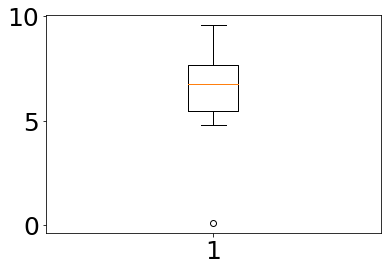

In [ ]:
plt.boxplot(df_avt.query("Activity_id=='g5_3-Act_12'")["Act_mark"])

{'boxes': [<matplotlib.lines.Line2D at 0x7f1006136b50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f100605ba50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f10061a9950>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f100605b4d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1006168710>,
  <matplotlib.lines.Line2D at 0x7f10073ab6d0>]}

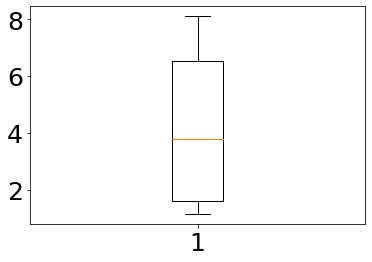

In [ ]:
plt.boxplot(df_avt.query("student_ID=='090888097S' & Course_code=='g8_1' & Activity_type=='0'").Act_mark)

In [ ]:
df_avt.index= df_avt.Act_submit_Time

## Graph all the students achievment in a specific subject

In [ ]:
import plotly.graph_objs as go
@interact(sbj=df_avt.Course_code.unique())
def plot_subject(sbj):
  plt.rcParams.update({'font.size': 25})
  x = np.arange(10)
  layout = go.Layout(
    autosize=False,
    width= 1200 , height= 600 )
  fig=go.Figure(layout=layout)

  fig.add_trace(go.Scatter(      
      x=df_avt[(df_avt.Course_code==sbj)&(
          df_avt.Activity_type=="0")].loc["2020-09":"2021-09", "Act_submit_Time"].sort_index(), 
      y=df_avt[(df_avt.Course_code==sbj)&(
          df_avt.Activity_type=="0")].loc["2020-09":"2021-09", "Act_mark"].sort_index()
      , mode='lines+markers', name="Quiz"))

  fig.add_trace(go.Scatter(
      x=df_avt[(df_avt.Course_code==sbj)&(
          df_avt.Activity_type=="1")].loc["2020-09":"2021-09", "Act_submit_Time"].sort_index(), 
      y=df_avt[(df_avt.Course_code==sbj)&(
          df_avt.Activity_type=="1")].loc["2020-09":"2021-09", "Act_mark"].sort_index()
      ,  name="Assignment", line_shape='vhv'))



  
  fig.update_layout(hovermode="x" , 
      # title="أداء جميع الطلبة في مادة معينة",
    xaxis_title="Submit Time",
    yaxis_title="Mark",
    # font=dict(
    #     family="Courier New, monospace",
    #     size=18,
    #     color="#7f7f7f")
     title={
        'text': "أداء جميع الطلبة في مادة معينة",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}) 
  fig.show()


interactive(children=(Dropdown(description='sbj', options=('g7_3', 'g5_1', 'g5_2', 'g5_3', 'g6_1', 'g6_3', 'g6…

## Compare the selected student's Quiz and Assignm. with Average of all students

In [ ]:
df_ActAv=pd.pivot_table(df_avt, index=["Course_code", "Activity_type", "Activity_id"], 
               values=["Act_diff", 	"Act_cp_count", 	"Act_time" , 	"Act_mark"] , aggfunc=("mean")).rename(
   columns={
    "Act_diff": "Act_diff_avg", 	
    "Act_cp_count": "Act_cp_avg", 	
    "Act_time" : "Act_time_avg" , 	
    "Act_mark" : "Act_mark_avg" 
   } 
)

In [ ]:
df_ActAv.head()

Act_cp_avg  ...  Act_time_avg
Course_code Activity_type Activity_id              ...              
g5_1        0             g5_1-Act_1     1.500000  ...    329.000000
                          g5_1-Act_10    1.000000  ...    272.000000
                          g5_1-Act_11    1.166667  ...    603.166667
                          g5_1-Act_12    1.500000  ...    289.500000
                          g5_1-Act_13    1.333333  ...    674.666667

[5 rows x 4 columns]

In [ ]:
df_ActAv.shape

(585, 4)

In [ ]:
df_avt.loc["2020-09"].head()

In [ ]:
df_avt.groupby(["student_ID", "Activity_type"]).agg("count").max()

In [ ]:
df_avt[df_avt.student_ID=="060674824"].loc["2020-4":"2021-2" ,["Course_code", "Activity_type" , "Activity_id", "Act_diff", 	"Act_cp_count", 	"Act_time"	,"Act_mark"]]

,Course_code,Activity_type,Activity_id,Act_diff,Act_cp_count,Act_time,Act_mark
Act_submit_Time,,,,,,,
2020-09-22 10:07:59,g9_3,1,g9_3-Act_17,2,2,230,8.69
2020-09-06 15:00:17,g9_3,0,g9_3-Act_7,2,1,861,2.46
2020-06-01 20:42:27,g9_1,1,g9_1-Act_17,4,2,516,0.20
2020-07-16 08:26:16,g9_3,0,g9_3-Act_4,3,1,483,7.61
2020-08-04 16:29:50,g9_2,0,g9_2-Act_16,4,1,877,4.89
2020-12-11 10:31:42,g9_2,1,g9_2-Act_4,2,2,661,0.38


In [ ]:
df_plt=df_avt[df_avt.student_ID=="060674824"].loc["2020-4":"2021-2" ,["Course_code", "Activity_type" , "Activity_id", "Act_diff", 	"Act_cp_count", 	"Act_time"	,"Act_mark"]]

In [ ]:
df_plt.groupby("Course_code").Activity_id.agg("count")

Course_code
g9_1    1
g9_2    2
g9_3    3
Name: Activity_id, dtype: int64

In [ ]:
df_plt.reset_index(inplace=True)

In [ ]:
df_plt=df_plt.merge( df_ActAv, on=["Activity_type", "Activity_id" ])

In [ ]:
df_plt.keys()

Index(['Act_submit_Time', 'Course_code', 'Activity_type', 'Activity_id',
       'Act_diff', 'Act_cp_count', 'Act_time', 'Act_mark', 'Act_cp_avg',
       'Act_diff_avg', 'Act_mark_avg', 'Act_time_avg'],
      dtype='object')

In [ ]:
df_plt.set_index("Act_submit_Time", inplace=True)

In [ ]:
# this is dataset for a particular Student.
df_plt.head()

,Course_code,Activity_type,Activity_id,Act_diff,Act_cp_count,Act_time,Act_mark,Act_cp_avg,Act_diff_avg,Act_mark_avg,Act_time_avg
Act_submit_Time,,,,,,,,,,,
2020-09-22 10:07:59,g9_3,1,g9_3-Act_17,2,2,230,8.69,2.000000,3.000000,6.562000,455.600000
2020-09-06 15:00:17,g9_3,0,g9_3-Act_7,2,1,861,2.46,1.500000,3.000000,4.496667,527.833333
2020-06-01 20:42:27,g9_1,1,g9_1-Act_17,4,2,516,0.20,1.600000,2.600000,3.028000,561.800000
2020-07-16 08:26:16,g9_3,0,g9_3-Act_4,3,1,483,7.61,1.666667,3.166667,5.690000,278.833333
2020-08-04 16:29:50,g9_2,0,g9_2-Act_16,4,1,877,4.89,1.428571,2.571429,5.961429,428.428571


In [ ]:
df_plt["Activity_type"]=df_plt.Activity_type.astype(int)  

In [ ]:
df_plt[df_plt.Activity_type==0]["Act_mark"]

Act_submit_Time
2020-09-06 15:00:17    2.46
2020-07-16 08:26:16    7.61
2020-08-04 16:29:50    4.89
Name: Act_mark, dtype: float64

In [ ]:
df_plt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2020-09-22 10:07:59 to 2020-12-11 10:31:42
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Course_code    6 non-null      object 
 1   Activity_type  6 non-null      int64  
 2   Activity_id    6 non-null      object 
 3   Act_diff       6 non-null      int64  
 4   Act_cp_count   6 non-null      int64  
 5   Act_time       6 non-null      int64  
 6   Act_mark       6 non-null      float64
 7   Act_cp_avg     6 non-null      float64
 8   Act_diff_avg   6 non-null      float64
 9   Act_mark_avg   6 non-null      float64
 10  Act_time_avg   6 non-null      float64
dtypes: float64(5), int64(4), object(2)
memory usage: 576.0+ bytes


In [ ]:
df_plt[df_plt.Activity_type==1]["Act_mark"]

Act_submit_Time
2020-09-22 10:07:59    8.69
2020-06-01 20:42:27    0.20
2020-12-11 10:31:42    0.38
Name: Act_mark, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns

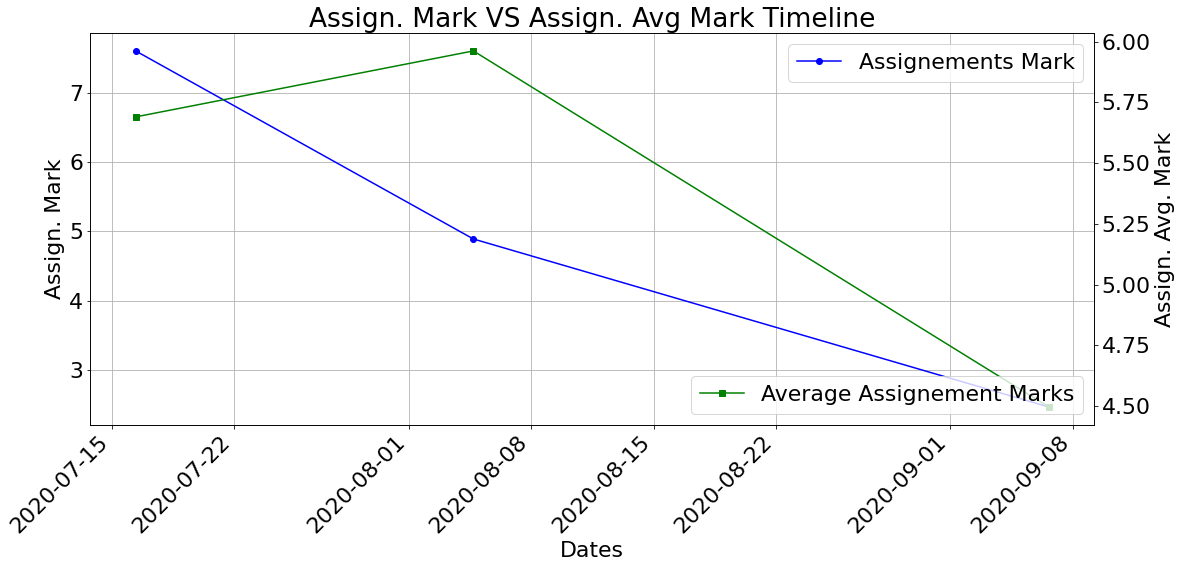

In [ ]:
plt.rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)

ax1.plot( df_plt[df_plt.Activity_type==0]["Act_mark"].sort_index(), marker="o" , color="blue", label="Assignements Mark")
ax2=ax1.twinx()
ax2.plot( df_plt[df_plt.Activity_type==0]["Act_mark_avg"].sort_index(), marker="s" , color="green", label="Average Assignement Marks" )

#plt.legend()
ax1.legend()
ax2.legend(loc="lower right")
ax1.grid()
ax2.set_ylabel("Assign. Avg. Mark")
ax1.set_ylabel("Assign. Mark")




ax1.set(xlabel="Dates",
        #ylabel="Quizzes Marks",
        title="Assign. Mark VS Assign. Avg Mark Timeline"        )
fig.autofmt_xdate(rotation=45)

In [ ]:
df_plt.reset_index(inplace=True)
df_plt.head()

,Act_submit_Time,Course_code,Activity_type,Activity_id,Act_diff,Act_cp_count,Act_time,Act_mark,Act_cp_avg,Act_diff_avg,Act_mark_avg,Act_time_avg
0,2020-09-22 10:07:59,g9_3,1,g9_3-Act_17,2,2,230,8.69,2.000000,3.000000,6.562000,455.600000
1,2020-09-06 15:00:17,g9_3,0,g9_3-Act_7,2,1,861,2.46,1.500000,3.000000,4.496667,527.833333
2,2020-06-01 20:42:27,g9_1,1,g9_1-Act_17,4,2,516,0.20,1.600000,2.600000,3.028000,561.800000
3,2020-07-16 08:26:16,g9_3,0,g9_3-Act_4,3,1,483,7.61,1.666667,3.166667,5.690000,278.833333
4,2020-08-04 16:29:50,g9_2,0,g9_2-Act_16,4,1,877,4.89,1.428571,2.571429,5.961429,428.428571


##  Data Preparation for prediction

In [ ]:
#  Add  5 selected student used  in the Graph Above

df_avt= df_avt.drop("Act_submit_Time", axis=1).reset_index().append( dt_st.reset_index())

In [ ]:
df_avt.tail()

,Act_submit_Time,student_ID,Course_code,Activity_id,Activity_type,Unit_id,Chapter_id,Lesson_id,Act_diff,Act_cp_count,Act_time,Act_mark
159,2020-01-24 17:08:35,080922088S,g7_2,g7_2-Act_8,0,Un_5,Chp_6,Ls_6,4,1,166,1.47
160,2020-06-01 03:42:18,080922088S,g7_2,g7_2-Act_8,0,Un_8,Chp_7,Ls_6,4,1,445,9.89
161,2020-11-29 18:02:43,080922088S,g7_2,g7_2-Act_5,1,Un_8,Chp_6,Ls_2,4,1,873,2.31
162,2020-03-09 09:20:50,080922088S,g7_2,g7_2-Act_3,1,Un_9,Chp_2,Ls_1,3,1,545,2.12
163,2020-03-16 23:51:23,080922088S,g7_2,g7_2-Act_8,1,Un_1,Chp_0,Ls_5,2,2,801,9.60


In [ ]:
df_avt.drop([  "Unit_id", "Chapter_id", "Lesson_id"], inplace=True, axis=1)

In [ ]:
df_avt.set_index("Act_submit_Time", inplace=True, drop=True)

In [ ]:
# df_avt.index=pd.to_datetime(df_avt.index)

In [ ]:
df_avt.tail()

,student_ID,Course_code,Activity_id,Activity_type,Act_diff,Act_cp_count,Act_time,Act_mark
Act_submit_Time,,,,,,,,
2020-01-24 17:08:35,080922088S,g7_2,g7_2-Act_8,0,4,1,166,1.47
2020-06-01 03:42:18,080922088S,g7_2,g7_2-Act_8,0,4,1,445,9.89
2020-11-29 18:02:43,080922088S,g7_2,g7_2-Act_5,1,4,1,873,2.31
2020-03-09 09:20:50,080922088S,g7_2,g7_2-Act_3,1,3,1,545,2.12
2020-03-16 23:51:23,080922088S,g7_2,g7_2-Act_8,1,2,2,801,9.60


In [ ]:
#  4  dashboard
#plt.rcParams.update({'font.size': 12})
#df_avt[["Act_mark"]].groupby(pd.Grouper(freq="W")).agg("mean").plot()

In [ ]:
df_act_Stat=pd.pivot_table(df_avt, index=["Course_code","Activity_type" ], 
               values=["Act_mark", "Act_diff", "Act_cp_count", "Act_time" , "Activity_id"]   , aggfunc={
                   "Act_mark":("mean","max", "count", "min"), 
                   "Act_diff": "mean",
                   "Act_cp_count": "mean",
                   "Act_time": ("mean", "max", "min"),
                   "Activity_id": lambda x: x.nunique()
               }).rename(columns={
                   "Activity_id" :  "Activities_Count"  #  number of activities
#                 "Act_mark":"Std_act_m", 
#                    "Act_diff": "Std_act_d",
#                    "Act_cp_count": "Std_act_cp",
#                    "Act_time": "Std_act_t"  

               })


In [ ]:
df_act_Stat.sample(5)

Act_cp_count  Act_diff  ... Act_time Activities_Count
                                  mean      mean  ...      min         <lambda>
Course_code Activity_type                         ...                          
g8_3        0                 1.418919  2.527027  ...     31.0               20
g7_2        1                 1.512195  2.439024  ...     30.0               19
g9_2        1                 1.438356  2.698630  ...     47.0               19
g5_3        0                 1.493333  2.466667  ...     30.0               20
g8_2        0                 1.481013  2.569620  ...     34.0               20

[5 rows x 10 columns]

In [ ]:
df_act_Stat.columns=[f"{i}_{j}" for  i , j in df_act_Stat.columns]

In [ ]:
df_avt[(df_avt.Course_code=="g5_1")&(df_avt.Activity_type=="0")].describe()

,Act_diff,Act_cp_count,Act_time,Act_mark
count,86.000000,86.000000,86.000000,86.000000
mean,2.488372,1.500000,462.290698,4.423023
std,1.114020,0.502933,267.539414,2.490742
min,1.000000,1.000000,32.000000,0.090000
25%,2.000000,1.000000,248.250000,2.375000
50%,2.000000,1.500000,461.500000,4.180000
75%,3.000000,2.000000,693.000000,6.157500
max,4.000000,2.000000,895.000000,9.370000


## Students' Achievement Statistics (( df_std ))  (( df_mg ))

In [ ]:
df_std_Stat=pd.pivot_table(df_avt, index=["student_ID","Course_code","Activity_type" ], 
               values=["Act_mark", "Act_diff", "Act_cp_count", "Act_time" ]   , aggfunc={
                   "Act_mark":("mean","max", "count", np.std, "last"), 
                   "Act_diff": "mean",
                   "Act_cp_count": "mean",
                   "Act_time": ("mean", "max", np.std)
               },  fill_value=0 ).rename(columns={
                "Act_mark":"Std_act_m", 
                   "Act_diff": "Std_act_d",
                   "Act_cp_count": "Std_act_cp",
                   "Act_time": "Std_act_t"   

               })
df_std_Stat.head()

Std_act_cp  ...   Std_act_t
                                           mean  ...         std
student_ID Course_code Activity_type             ...            
060102740  g9_1        0                   1.75  ...  169.440255
                       1                   1.00  ...  167.443523
           g9_2        1                   1.50  ...  279.307179
           g9_3        0                   2.00  ...    0.000000
060119192  g9_1        0                   1.00  ...  280.150406

[5 rows x 10 columns]

In [ ]:
df_avt.sample()

,student_ID,Course_code,Activity_id,Activity_type,Act_diff,Act_cp_count,Act_time,Act_mark
Act_submit_Time,,,,,,,,
2020-12-14 02:42:52,101298080,g5_3,g5_3-Act_11,0,3,1,229,5.64


In [ ]:
df_avt[(df_avt.student_ID=="060102740")& (df_avt.Course_code=="g9_1")]

,student_ID,Course_code,Activity_id,Activity_type,Act_diff,Act_cp_count,Act_time,Act_mark
Act_submit_Time,,,,,,,,
2020-05-27 01:06:31,060102740,g9_1,g9_1-Act_7,1,4,1,481,0.52
2020-05-25 02:28:51,060102740,g9_1,g9_1-Act_15,0,3,2,222,5.84
2020-01-14 14:01:02,060102740,g9_1,g9_1-Act_9,0,3,2,165,6.68
2020-10-05 00:52:17,060102740,g9_1,g9_1-Act_9,1,3,1,149,9.39
2020-03-15 10:19:07,060102740,g9_1,g9_1-Act_9,0,3,2,374,3.50
2020-03-16 13:51:19,060102740,g9_1,g9_1-Act_3,1,4,1,353,2.88
2020-03-13 14:14:29,060102740,g9_1,g9_1-Act_14,0,2,1,543,3.38


In [ ]:
df_std_Stat.columns=[f"{i}_{j}" for  i , j in df_std_Stat.columns]

In [ ]:
df_std_Stat.sample(5)

,,,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_last,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std
student_ID,Course_code,Activity_type,,,,,,,,,,
100895602,g5_3,1,1.0,4.0,1,7.77,7.77,7.77,0.000000,259,259.0,0.000000
071212208,g8_3,1,2.0,4.0,1,5.38,5.38,5.38,0.000000,48,48.0,0.000000
091143079,g6_3,1,1.0,4.0,1,9.72,9.72,9.72,0.000000,282,282.0,0.000000
080371981,g7_3,1,2.0,3.5,2,0.89,5.99,3.44,3.606245,450,432.0,25.455844
071150765,g8_1,0,1.0,3.0,1,7.98,7.98,7.98,0.000000,232,232.0,0.000000


- Ranking

$$\Large score=\log(\frac{\text{Qz_Max_time}}{\text{Qz_Avg_tim}}+\text{Qz_avg_diff*Qz_Avg_cp})*\frac{\text{Qz_Avg_mark}^2}{\text{Qz_Max_mark}}$$

In [ ]:
df_std_Stat["Act_score"]=np.log1p( 
    df_std_Stat.Std_act_t_max/df_std_Stat.Std_act_t_mean +df_std_Stat.Std_act_d_mean* df_std_Stat.Std_act_cp_mean
)*df_std_Stat["Std_act_m_max"]**2/df_std_Stat.Std_act_m_mean

In [ ]:
# reset index   for  Students    data
df_std_Stat.reset_index(inplace=True)
# reset index for   activities data
df_act_Stat.reset_index(inplace=True)

In [ ]:
# Merge Data
df_mg=df_std_Stat.merge(df_act_Stat,  on=["Course_code", "Activity_type"])

In [ ]:
df_mg.head()

,student_ID,Course_code,Activity_type,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_last,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std,Act_score,Act_cp_count_mean,Act_diff_mean,Act_mark_count,Act_mark_max,Act_mark_mean,Act_mark_min,Act_time_max,Act_time_mean,Act_time_min,Activities_Count_<lambda>
0,060102740,g9_1,0,1.75,2.75,4,3.38,6.68,4.8500,1.664572,543,326.00,169.440255,18.511254,1.569892,2.655914,93,9.91,4.782796,0.07,886.0,470.397849,31.0,20
1,060119192,g9_1,0,1.00,3.00,4,4.76,8.10,5.2475,2.520018,764,478.25,280.150406,21.534314,1.569892,2.655914,93,9.91,4.782796,0.07,886.0,470.397849,31.0,20
2,060120769,g9_1,0,2.00,4.00,1,2.42,2.42,2.4200,0.000000,194,194.00,0.000000,5.572256,1.569892,2.655914,93,9.91,4.782796,0.07,886.0,470.397849,31.0,20
3,060121192,g9_1,0,2.00,3.50,2,6.88,6.88,6.5100,0.523259,856,634.50,313.248304,16.252782,1.569892,2.655914,93,9.91,4.782796,0.07,886.0,470.397849,31.0,20
4,060163708,g9_1,0,1.00,2.00,2,1.07,5.61,3.3400,3.210265,746,524.00,313.955411,14.011382,1.569892,2.655914,93,9.91,4.782796,0.07,886.0,470.397849,31.0,20


In [ ]:
df_mg["last_mark"]=df_mg.Std_act_m_last  # put the target at the end of table
df_mg.drop("Std_act_m_last", axis=1, inplace=True)  #  drop the last mark feature.

In [ ]:
df_mg.sample(3)

,student_ID,Course_code,Activity_type,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std,Act_score,Act_cp_count_mean,Act_diff_mean,Act_mark_count,Act_mark_max,Act_mark_mean,Act_mark_min,Act_time_max,Act_time_mean,Act_time_min,Activities_Count_<lambda>,last_mark
501,091146072,g6_3,0,1.000000,3.000000,1,0.58,0.580000,0.000000,74,74.000000,0.000000,0.933474,1.516854,2.471910,89,9.83,4.414607,0.23,897.0,429.213483,31.0,20,0.58
471,090393922,g6_3,0,2.000000,2.000000,1,9.31,9.310000,0.000000,484,484.000000,0.000000,16.681281,1.516854,2.471910,89,9.83,4.414607,0.23,897.0,429.213483,31.0,20,9.31
1222,100373343,g5_3,0,1.333333,3.333333,3,6.02,2.823333,2.803932,604,473.333333,157.118851,24.454731,1.493333,2.466667,75,9.88,5.071333,0.00,875.0,420.466667,30.0,20,0.78


In [ ]:
df_mg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   student_ID                 1300 non-null   object 
 1   Course_code                1300 non-null   object 
 2   Activity_type              1300 non-null   object 
 3   Std_act_cp_mean            1300 non-null   float64
 4   Std_act_d_mean             1300 non-null   float64
 5   Std_act_m_count            1300 non-null   int64  
 6   Std_act_m_max              1300 non-null   float64
 7   Std_act_m_mean             1300 non-null   float64
 8   Std_act_m_std              1300 non-null   float64
 9   Std_act_t_max              1300 non-null   int64  
 10  Std_act_t_mean             1300 non-null   float64
 11  Std_act_t_std              1300 non-null   float64
 12  Act_score                  1299 non-null   float64
 13  Act_cp_count_mean          1300 non-null   float

In [ ]:
df_mg.to_csv("./Data/MarkPrediction.csv")

## Load the dataset that has statistics about students achievments (( df_mg ))

In [ ]:
df_mg=pd.read_csv("./Data/MarkPrediction.csv", index_col=0)

## Pipeline    SGB Regressor  Mark Prediction 
![](https://i.ibb.co/xzWVv5H/pipe-Lasso.png)

In [ ]:
df_mg.set_index("student_ID", inplace=True)

In [ ]:
# Split Data

X_train=df_mg.drop(dt_st.student_ID.unique(), axis = 0).iloc[:,:-1]
y=df_mg.drop(dt_st.student_ID.unique(), axis = 0).iloc[:, -1]

In [ ]:
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import make_column_transformer , make_column_selector  as selector

from sklearn.pipeline import make_pipeline
  
num_pipeline= make_pipeline(
     StandardScaler( )    # Rescaling
)

cat_pipeline= make_pipeline(
      
     OneHotEncoder(drop="if_binary" , sparse=False ), 
 
)

In [ ]:
#  Pipeline structure 
preprocess= make_column_transformer(
     ( num_pipeline,  selector(dtype_include="number") ),  #Numeric feature rescaling
     (cat_pipeline, selector(dtype_exclude="number"))  # Categorical features Encoding
     )

In [ ]:
preprocess.fit_transform(X_train).shape

(1270, 36)

In [ ]:
preprocess.fit_transform(X_train)[0]

array([ 0.56900124,  0.24069093,  2.2926457 ,  0.26329189, -0.02259132,
        0.25708879, -0.03347743, -0.63366258,  0.41728188,  0.58217701,
        1.22258527,  1.01329121,  1.34219166,  0.23572215, -0.60497761,
       -0.56518716, -0.62790767,  0.4883795 , -0.59366689,  0.73831001,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ])

In [ ]:
# pipelline Model

from xgboost import XGBRegressor
pipe_reg= make_pipeline(
    preprocess, 
    XGBRegressor(objective="reg:squarederror")
    )

In [ ]:
pipe_reg.get_params()

In [ ]:
# hyper parameters

param_grid={
    "xgbregressor__learning_rate": [0.01, 0.1],
    "xgbregressor__max_depth" : [3,5,7, 10] ,
    "xgbregressor__min_child_weight" :[1,3,5],
    "xgbregressor__subsample": [0.5, 0.7],
    "xgbregressor__colsample_bytree": [0.5, 0.7],
    "xgbregressor__n_estimators": [200, 400, 1000]
    
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, KFold

kf= KFold( n_splits=5, shuffle=True )
gs= RandomizedSearchCV( pipe_reg, param_distributions=param_grid,  scoring="neg_mean_squared_error", cv=kf,verbose=3)

In [ ]:
gs.fit(X_train, y)

In [ ]:
gs.best_estimator_

In [ ]:
gs.best_params_

{'xgbregressor__colsample_bytree': 0.5,
 'xgbregressor__learning_rate': 0.01,
 'xgbregressor__max_depth': 3,
 'xgbregressor__min_child_weight': 3,
 'xgbregressor__n_estimators': 400,
 'xgbregressor__subsample': 0.7}

In [ ]:
df_mg.loc[dt_st.student_ID.unique(), :].iloc[:, :-1].sample()

,Course_code,Activity_type,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std,Act_score,Act_cp_count_mean,Act_diff_mean,Act_mark_count,Act_mark_max,Act_mark_mean,Act_mark_min,Act_time_max,Act_time_mean,Act_time_min,Activities_Count_<lambda>
student_ID,,,,,,,,,,,,,,,,,,,,,,
100878040S,g9_3,1,1.0,3.0,3,9.53,6.716667,3.448149,897,490.666667,353.887459,23.834676,1.6125,2.7,80,9.97,4.926,0.01,897.0,396.1375,33.0,19


In [ ]:
y_pred=gs.predict(X_train)

In [ ]:
from sklearn import  metrics
print(f"  MAE : { metrics.mean_absolute_error(y, y_pred):.3f}")
print(f"  MSE : { metrics.mean_squared_error(y, y_pred):.3f}")
print(f"  RMSE : { np.sqrt(metrics.mean_squared_error(y, y_pred)):.3f}")
print(f"  R^2 : { metrics.r2_score(y, y_pred):.3f}")
print(f"  Explained Variance Score : { metrics.mean_absolute_error(y, y_pred):.3f}")

  MAE : 0.927
  MSE : 1.932
  RMSE : 1.390
  R^2 : 0.773
  Explained Variance Score : 0.927


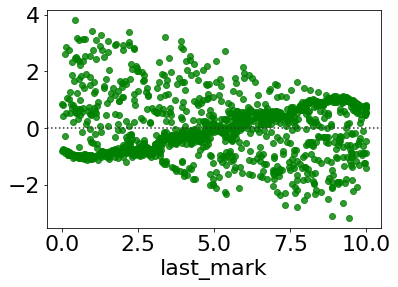

In [ ]:
# Residual Plot

import seaborn as sns
_= sns.residplot(x=y, y=y_pred, color="green")

In [ ]:
predict_std = df_mg.loc[dt_st.student_ID.unique(), :].iloc[:, :-1]

In [ ]:
gs.predict(predict_std)

array([4.782822 , 5.2103243, 6.609596 , 4.309903 , 4.2178974, 2.2365794,
       5.659911 , 6.2965355, 4.4546375, 5.304943 , 6.9272265, 5.9009876,
       5.3262243, 2.5363755, 6.544488 , 6.305814 , 3.4510658, 6.028008 ,
       4.7204905, 4.3917885, 7.199484 , 2.679353 , 2.172234 , 5.7444777,
       5.2749553, 6.1614637, 5.115923 , 3.9724207, 4.672065 , 6.9566555],
      dtype=float32)

In [ ]:
predict_std["last_mark"]=gs.predict(predict_std)

In [ ]:
predict_std.query("student_ID=='101235516S' & Activity_type=='1'")

,Course_code,Activity_type,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std,Act_score,Act_cp_count_mean,Act_diff_mean,Act_mark_count,Act_mark_max,Act_mark_mean,Act_mark_min,Act_time_max,Act_time_mean,Act_time_min,Activities_Count_<lambda>,last_mark
student_ID,,,,,,,,,,,,,,,,,,,,,,,
101235516S,g5_1,1,1.500000,1.750000,4,9.64,4.857500,3.190009,792,425.000000,288.616239,32.573864,1.505882,2.717647,85,9.99,5.004824,0.16,882.0,450.376471,31.0,20,5.210324
101235516S,g5_2,1,1.750000,2.750000,4,9.13,3.772500,3.852345,487,182.250000,208.367264,47.246825,1.551020,2.551020,98,9.90,5.351939,0.26,881.0,482.051020,32.0,20,4.309903
101235516S,g5_3,1,1.666667,2.333333,3,2.37,1.873333,0.515978,874,728.333333,187.340154,5.416408,1.562500,2.350000,80,9.99,5.181000,0.05,889.0,487.187500,54.0,20,2.236579


In [ ]:
df_append= dt_st.query("student_ID=='101235516S' & Activity_type=='1'")

In [ ]:
from datetime import  timedelta
x_point, y_point= df_append.reset_index().query(
    "student_ID=='101235516S' & Activity_type=='1'"
    )["Act_submit_Time"].max()+ timedelta(days=7), dt_st.query("student_ID=='101235516S' & Activity_type=='1'").Last_mark

Timestamp('2020-12-15 09:25:43')

In [ ]:
df_append.reset_index().append(
    {
        "Act_submit_Time" :df_append.reset_index().query(
    "student_ID=='101235516S' & Activity_type=='1'"
    )["Act_submit_Time"].max()+ timedelta(days=7),
     "last_mark": 2.2
    }, ignore_index=True
)

## Graph the predicted mark of a specific student

In [ ]:
df_append

,student_ID,Course_code,Activity_id,Activity_type,Unit_id,Chapter_id,Lesson_id,Act_diff,Act_cp_count,Act_time,Act_mark
Act_submit_Time,,,,,,,,,,,
2020-03-04 14:00:16,101235516S,g5_3,g5_3-Act_3,1,Un_3,Chp_9,Ls_5,2,2,794,1.91
2020-05-04 03:59:02,101235516S,g5_3,g5_3-Act_2,1,Un_3,Chp_6,Ls_0,4,2,517,1.34
2020-11-29 06:41:36,101235516S,g5_3,g5_3-Act_4,1,Un_6,Chp_1,Ls_4,1,1,874,2.37
2020-01-11 11:36:15,101235516S,g5_2,g5_2-Act_7,1,Un_4,Chp_8,Ls_9,1,2,45,9.13
2020-04-22 08:42:54,101235516S,g5_2,g5_2-Act_5,1,Un_4,Chp_6,Ls_0,4,2,51,0.74
2020-08-18 14:13:57,101235516S,g5_2,g5_2-Act_3,1,Un_4,Chp_9,Ls_1,2,2,146,4.01
2020-01-07 22:29:51,101235516S,g5_2,g5_2-Act_3,1,Un_1,Chp_4,Ls_2,4,1,487,1.21
2020-02-23 07:04:45,101235516S,g5_1,g5_1-Act_3,1,Un_2,Chp_9,Ls_3,2,2,87,3.36
2020-12-08 09:25:43,101235516S,g5_1,g5_1-Act_8,1,Un_1,Chp_7,Ls_0,1,1,394,3.31


In [ ]:
#  NUmber of Assignments is less then Quizzes
@interact(st = stID, cs = course)
def plot_data( st, cs):
  # print(predict_std.reset_index().query(f"Course_code=='{cs}' & student_ID=='{st}'"))
  
  plot_std_Data(st, cs, True )

interactive(children=(Dropdown(description='st', index=3, options=('101235516S', '100878040S', '060674824S', '…

## Check if needed

In [ ]:
#  Last Mark Comparaison
pd.DataFrame({"Actual Mark": y_test, "Predicted Mark": y_pred}).sample(6)

,Actual Mark,Predicted Mark
student_ID,,
100813564,9.73,6.034192
110723380,8.21,8.199186
130698091,0.45,3.599329
060844639,3.03,2.991964
140261662,0.51,0.600607
110703780,1.45,1.279370


In [ ]:
X_test["predicted_Mark"]=y_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
X_test=X_test.reindex()

In [ ]:
X_test.student_ID=="120405564"

student_ID
140286938    False
120605077    False
100115512    False
110745570    False
110810510    False
             ...  
070285557    False
060860198    False
081063216    False
070424979    False
120594765    False
Name: student_ID, Length: 1327, dtype: bool

In [ ]:
#X_test["student_ID"]=120405564
X_test.loc[X_test['student_ID'] =="120405564"]


,Course_code,Activity_type,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std,Act_score,Act_cp_mean,Act_diff_mean,Act_mark_count,Act_mark_max,Act_mark_mean,Act_mark_min,Act_time_max,Act_time_mean,Act_time_min,Activities_Count_<lambda>,predicted_Mark,student_ID
student_ID,,,,,,,,,,,,,,,,,,,,,,,,


In [ ]:
To show the predicted value on the graph


import plotly.express as px

#df = px.data.gapminder().query("continent=='Oceania'")

fig= px.line(df_plt.sort_values(by="Act_submit_Time"), 
             x="Act_submit_Time", y="Act_mark"  , title="Comparision between the student's mark (LINE) and the average of all students marks (BAR)", 
             labels ={"mark": "Act_mark" , "submit_Time" :"Act_submit_Time" } , 
             color_discrete_map={
                 "Act_mark": "blue"               
             })
fig1= px.bar(df_plt.sort_values(by="Act_submit_Time"),  labels= {"Act_submit_Time" :"Time" },
             x="Act_submit_Time", y="Act_mark_avg" , title="Comparision between the student's mark and the average of all students marks" ,      
              )
fig.add_trace(fig1.data[0])
#fig.update_layout(legend_title_text='Trend')



fig.update_traces(  hovertemplate=None)
fig.update_layout(hovermode="x" )


fig['data'][0]['showlegend']=True
fig['data'][0]['name']="Student's mark"

fig['data'][1]['showlegend']=True
fig['data'][1]['name']="Average Mark"

fig.show()




SyntaxError: ignored

## Pipeline    SGB Classsifier  Classification  Prediction 
![](https://i.ibb.co/xzWVv5H/pipe-Lasso.png)

In [ ]:
df_stClass= df_mg.copy()

In [ ]:
df_stClass.head()

,Course_code,Activity_type,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std,Act_score,Act_cp_count_mean,Act_diff_mean,Act_mark_count,Act_mark_max,Act_mark_mean,Act_mark_min,Act_time_max,Act_time_mean,Act_time_min,Activities_Count_<lambda>,last_mark
student_ID,,,,,,,,,,,,,,,,,,,,,,,
060102740,g9_1,0,1.75,2.75,4,6.68,4.8500,1.664572,543,326.00,169.440255,18.511254,1.569892,2.655914,93,9.91,4.782796,0.07,886.0,470.397849,31.0,20,3.38
060119192,g9_1,0,1.00,3.00,4,8.10,5.2475,2.520018,764,478.25,280.150406,21.534314,1.569892,2.655914,93,9.91,4.782796,0.07,886.0,470.397849,31.0,20,4.76
060120769,g9_1,0,2.00,4.00,1,2.42,2.4200,0.000000,194,194.00,0.000000,5.572256,1.569892,2.655914,93,9.91,4.782796,0.07,886.0,470.397849,31.0,20,2.42
060121192,g9_1,0,2.00,3.50,2,6.88,6.5100,0.523259,856,634.50,313.248304,16.252782,1.569892,2.655914,93,9.91,4.782796,0.07,886.0,470.397849,31.0,20,6.88
060163708,g9_1,0,1.00,2.00,2,5.61,3.3400,3.210265,746,524.00,313.955411,14.011382,1.569892,2.655914,93,9.91,4.782796,0.07,886.0,470.397849,31.0,20,1.07


- Ranking

$$\Large score=\log(\frac{\text{Qz_Max_time}}{\text{Qz_Avg_tim}}+\text{Qz_avg_diff*Qz_Avg_cp})*\frac{\text{Qz_Avg_mark}^2}{\text{Qz_Max_mark}}$$

In [ ]:
df_stClass.Act_score.describe().T

count    1299.000000
mean       13.889829
std         8.889857
min         0.043944
25%         6.887793
50%        12.961852
75%        19.317732
max        60.259700
Name: Act_score, dtype: float64

In [ ]:
df_stClass.Act_score.quantile(0.25)

6.887793441795189

In [ ]:
#  feature  Engineering

bins = [0, 
        df_stClass.Act_score.quantile(0.25),
        df_stClass.Act_score.quantile(0.5),
        df_stClass.Act_score.quantile(0.75), 
        df_stClass.Act_score.quantile(1)]
names = ['D', 'C', 'B', 'A']

df_stClass['Score_Class'] = pd.cut(df_stClass.Act_score,
                           bins, labels=names)

In [ ]:
df_stClass.head()

#  It's better to add data related to  timestamp feature:  dat, month, dayofteweek, monthOfTheyear .....

,Course_code,Activity_type,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std,Act_score,Act_cp_count_mean,Act_diff_mean,Act_mark_count,Act_mark_max,Act_mark_mean,Act_mark_min,Act_time_max,Act_time_mean,Act_time_min,Activities_Count_<lambda>,last_mark,Score_Class
student_ID,,,,,,,,,,,,,,,,,,,,,,,,
060102740,g9_1,0,1.75,2.75,4,6.68,4.8500,1.664572,543,326.00,169.440255,18.511254,1.569892,2.655914,93,9.91,4.782796,0.07,886.0,470.397849,31.0,20,3.38,B
060119192,g9_1,0,1.00,3.00,4,8.10,5.2475,2.520018,764,478.25,280.150406,21.534314,1.569892,2.655914,93,9.91,4.782796,0.07,886.0,470.397849,31.0,20,4.76,A
060120769,g9_1,0,2.00,4.00,1,2.42,2.4200,0.000000,194,194.00,0.000000,5.572256,1.569892,2.655914,93,9.91,4.782796,0.07,886.0,470.397849,31.0,20,2.42,D
060121192,g9_1,0,2.00,3.50,2,6.88,6.5100,0.523259,856,634.50,313.248304,16.252782,1.569892,2.655914,93,9.91,4.782796,0.07,886.0,470.397849,31.0,20,6.88,B
060163708,g9_1,0,1.00,2.00,2,5.61,3.3400,3.210265,746,524.00,313.955411,14.011382,1.569892,2.655914,93,9.91,4.782796,0.07,886.0,470.397849,31.0,20,1.07,B


In [ ]:
df_stClass.drop("Act_score", axis=1, inplace=True)

In [ ]:
# Split Data

X=df_stClass.iloc[:,:-1]
y=df_stClass["Score_Class"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y  , test_size=.3,   random_state=42)

In [ ]:
X_train.shape, X_test.shape

((910, 22), (390, 22))

In [ ]:
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import make_column_transformer , make_column_selector  as selector

from sklearn.pipeline import make_pipeline
  
num_pipeline= make_pipeline(
     StandardScaler( )    # Rescaling
)

cat_pipeline= make_pipeline(
      
     OneHotEncoder(drop="if_binary" , sparse=False ), 
 
)

In [ ]:
#  Pipeline structure 

preprocess= make_column_transformer(
     ( num_pipeline,  selector(dtype_include="number") ),  #Numeric feature rescaling
     (cat_pipeline, selector(dtype_exclude="number"))  # Categorical features Encoding
     )

In [ ]:
preprocess.fit_transform(X_train).shape

(910, 36)

In [ ]:
preprocess.fit_transform(X_train)[0]

array([ 1.17989508,  1.54523704, -0.77397973,  0.61773412,  1.17657638,
       -0.82208701,  0.60340813,  1.17728814, -0.8166143 , -2.06474676,
       -0.06480395, -0.91140026, -0.69575924, -0.63515656, -0.81090783,
        0.51504652,  0.690965  , -0.58280923,  0.75251223,  0.96956564,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

In [ ]:
# pipelline Model

from xgboost import XGBClassifier
pipe_reg= make_pipeline(
    preprocess, 
    XGBClassifier()
    )

In [ ]:
pipe_reg.get_params()

In [ ]:
# hyper parameters

param_grid = {
    'xgbclassifier__n_estimators': [50, 100, 150, 200],
    'xgbclassifier__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'xgbclassifier__max_depth': range(3, 5),
    'xgbclassifier__colsample_bytree': [i/10.0 for i in range(1, 3)],
    'xgbclassifier__gamma': [i/10.0 for i in range(3)],
    
}

In [ ]:
# AUC and accuracy as score

from sklearn.metrics import accuracy_score, make_scorer, f1_score
# f1_scorer = make_scorer(f1_score, pos_label="yes", average="micro")

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, KFold

kf= KFold( n_splits=5, shuffle=True )
gs= RandomizedSearchCV( pipe_reg, param_distributions=param_grid,  scoring=make_scorer(f1_score(average='micro')),  cv=kf,verbose=3)

In [ ]:
gs.fit(X_train, y_train)

In [ ]:
gs.best_estimator_

In [ ]:
gs.best_params_

In [ ]:
X_test.sample()

In [ ]:
std_Pred=X_test.loc["120512419"]

In [ ]:
gs.predict(X_test.loc["120512419"])

In [ ]:
std_Pred["Predicted_mark"]=gs.predict(X_test.loc["120512419"])

In [ ]:
std_Pred

In [ ]:
y_pred=gs.predict(X_test)

In [ ]:
from sklearn import  metrics
print(f"  MAE : { metrics.mean_absolute_error(y_test, y_pred):.3f}")
print(f"  MSE : { metrics.mean_squared_error(y_test, y_pred):.3f}")
print(f"  RMSE : { np.sqrt(metrics.mean_squared_error(y_test, y_pred)):.3f}")
print(f"  R^2 : { metrics.r2_score(y_test, y_pred):.3f}")
print(f"  Explained Variance Score : { metrics.mean_absolute_error(y_test, y_pred):.3f}")

In [ ]:
# Residual Plot

import seaborn as sns
_= sns.residplot(x=y_test, y=y_pred, color="green")

In [ ]:
X_test.shape

In [ ]:
X_test.sample()

In [ ]:
df_avt.sample()

In [ ]:
df_avt.keys()

In [ ]:
X_test.keys()

In [ ]:
#  Last Mark Comparaison

pd.DataFrame({"Actual Mark": y_test, "Predicted Mark": y_pred}).sample(6)

In [ ]:
X_test["predicted_Mark"]=y_pred

In [ ]:
X_test.head()

## Recommendation 



###  recommendation CountVetorization

In [ ]:
#  all program we can encapsulate within a file.py shouls be implemented

In [33]:
modules=[
         {"unit":"Data and statistics", 
          "lessons":[
                    {"LessName": "Dot plots & frequency tables",
                    "lobs":[
                            {"lobID": 1, "lobName":"Representing Data", "URL":, "URL": "https://" },
                            {"lobID": 2,"lobName":"Frequency Tables & dot plot", "URL": "https://"}
                          ]
                          
                    },
                    {"LessName": "Statistical questions",
                    "lobs":[
                            {"lobID": 3, "lobName":"Statistical questions", "URL": "https://"}
                          ]
                    },
                    {"LessName": "Histograms",
                    "lobs":[
                            {"lobID": 4, "lobName":"Creating a histogram", "URL": "https://"},
                            {"lobID": 5, "lobName":"Interpreting a histogram", "URL": "https://"}
                          ]
                    },
                    {"LessName": "Mean and median",
                    "lobs":[
                            
                                {"lobID": 6, "lobName":"Statistics Intro: Mean, Median & Mode", "URL": "https://"}, 
                                {"lobID": 7, "lobName":"Mean, Median & Mode example", "URL": "https://"},
                                {"lobID": 8 , "lobName":"Calculating the mean", "URL": "https://"}
                                
                                
                          ]
                    },
                    {"LessName": "Mean and median challenge problems",
                    "lobs":[
                             {"lobID": 9, "lobName": "Missing value given the mean", "URL": "https://"},
                              {"lobID":10 , "lobName":"Mean as the balancing point"},
                              {"lobID": 11, "lobName":"Impact on median & mean: Removing an outlier"},
                              {"lobID": 12, "lobName":"Impact on median & mean: increasing an outlier"},
                              {"lobID": 13, "lobName":"Median & range puzzlers"}
                          ]
                    },
                    {"LessName": "Interquartile range (IQR)",
                    "lobs":[
                            {"lobID": 14, "lobName":"Interquartile range (IQR)"}
                          ]
                    },
                    {"LessName": "Box Plots",
                    "lobs":[
                            {"lobID":15  , "lobName":"Reading box plots"},
                             {"lobID":16  , "lobName":"Constructing a box plot"},
                             {"lobID":17  , "lobName":"Worked example: Creating box plot (odd number of data points)"},
                             {"lobID":18  , "lobName":"Worked example: Creating box plot (even number of data points)"},
                             {"lobID":19  , "lobName":"Worked example: Interpreting a box plot"}
                          ]
                    },

                    {"LessName": "Mean absolute deviation (MAD)",
                    "lobs":[
                            { "lobID":20 , "lobName":"Mean absolute deviation (MAD)"},
                              {"lobID":21 , "lobName":"Mean absolute deviation example"}
                          ]
                    },
                    {"LessName": "Comparing Data Display",
                    "lobs":[
                            {"lobID":22 , "lobName":"Comparing dot plots, histograms and box plots"}
                          ]
                    },
                    {"LessName": "Shape of Data Distribution",
                    "lobs":[
                            {"lobID":23 , "lobName":"Shape of distributions"},
                              {"lobID":24 , "lobName":"Clusters, gaps, peaks & outliers"}
                          ]
                    },
                    

                    
                    ],
           
          
          }
         ]

In [ ]:
#### NO NEED TO RUN

import random, numpy as np
md=modules[0]["lessons"]
RndLesson= int(len(md)*np.random.rand()-1)
lob= md[RndLesson]["lobs"]

RndLob= int(len(md[RndLesson]["lobs"])*np.random.rand())
# [0]["lobID"]
# print(lob, RndLesson)
# print(md[RndLesson]["LessName"])  
# print(md[RndLesson]["lobs"][RndLob]["lobID"])
# print(md[RndLesson]["lobs"][RndLob]["lobName"])
# for item in md:
#   print(item)
for item  in   md:
  # print(item)
  for i in item["lobs"]:
    print(i["lobID"])

In [35]:
dt_st.student_ID.unique()

array(['070877232S', '090595032S', '100909663S', '090349526S',
       '070270034S'], dtype=object)

In [36]:
lst=[]

md=modules[0]["lessons"]

for st in  dt_st.student_ID.unique():
  for i   in range(int(30*np.random.rand()+8)):
    RndLesson= int(len(md)*np.random.rand()-1)
    RndLob= int(len(md[RndLesson]["lobs"])*np.random.rand())
    activities= {
        "student_ID": st ,
        # "Course_code":course_id,  
        # "Unit_des":  random.choice([ "Un_"+str(k) for k in range(10)]),
        "Lesson_des": md[RndLesson]["LessName"],

        "lobj_id": md[RndLesson]["lobs"][RndLob]["lobID"], 
        "lobj_des": md[RndLesson]["lobs"][RndLob]["lobName"],  
        # "Subcps": [ subcp[s]  for   i in range (1, int((len(subcps)*np.random.rand()+2)))] 

    }
    lst.append(activities)
df_recommend=pd.DataFrame(lst)
df_recommend.shape

(145, 4)

In [37]:
df_recommend["LearningObj"]=df_recommend.Lesson_des+ " " + df_recommend.lobj_des

In [112]:
df_recommend.head()

,student_ID,Lesson_des,lobj_id,lobj_des,LearningObj
0,070877232S,Mean and median challenge problems,13,Median & range puzzlers,Mean and median challenge problems Median & ra...
1,070877232S,Comparing Data Display,22,"Comparing dot plots, histograms and box plots","Comparing Data Display Comparing dot plots, hi..."
2,070877232S,Dot plots & frequency tables,2,Frequency Tables & dot plot,Dot plots & frequency tables Frequency Tables ...
3,070877232S,Comparing Data Display,22,"Comparing dot plots, histograms and box plots","Comparing Data Display Comparing dot plots, hi..."
4,070877232S,Statistical questions,3,Statistical questions,Statistical questions Statistical questions


In [122]:
for  url  in  lst_obj:
  print(df_recommend.query(f"lobj_des=='{url}' ").lobj_id.unique())

[1]
[18]
[17]
[19]
[20]


In [46]:
vrst='070877232S'
list(df_recommend.query(f"student_ID=='{vrst}'").lobj_id.unique())

[13, 22, 2, 3, 21, 8, 11, 14, 5, 9, 12, 4, 7, 6, 10, 15]

In [47]:
#  Current student  LOBs
df_st_Rec=df_recommend.query(f"student_ID=='{vrst}'").drop_duplicates(subset=["lobj_id"], keep="first")
df_st_Rec.head()

,student_ID,Lesson_des,lobj_id,lobj_des,LearningObj
0,070877232S,Mean and median challenge problems,13,Median & range puzzlers,Mean and median challenge problems Median & ra...
1,070877232S,Comparing Data Display,22,"Comparing dot plots, histograms and box plots","Comparing Data Display Comparing dot plots, hi..."
2,070877232S,Dot plots & frequency tables,2,Frequency Tables & dot plot,Dot plots & frequency tables Frequency Tables ...
4,070877232S,Statistical questions,3,Statistical questions,Statistical questions Statistical questions
5,070877232S,Mean absolute deviation (MAD),21,Mean absolute deviation example,Mean absolute deviation (MAD) Mean absolute de...


In [65]:
sorted_score=[]
cs=[]

In [66]:
df_recommend.sample()

,student_ID,Lesson_des,lobj_id,lobj_des,LearningObj
6,070877232S,Mean and median,8,Calculating the mean,Mean and median Calculating the mean


In [77]:
df_vectorize=df_recommend[df_recommend.student_ID !=vrst].append({"student_ID":vrst, "Lesson_des":df_st_Rec.loc[2,"Lesson_des" ],"lobj_id":df_st_Rec.loc[2,"lobj_id"],
     "lobj_des":df_st_Rec.loc[2,"lobj_des"],"LearningObj":df_st_Rec.loc[2,"LearningObj"] }, ignore_index=True)

df_vectorize.tail()

,student_ID,Lesson_des,lobj_id,lobj_des,LearningObj
106,070270034S,Mean and median,6,"Statistics Intro: Mean, Median & Mode","Mean and median Statistics Intro: Mean, Median..."
107,070270034S,Dot plots & frequency tables,1,Representing Data,Dot plots & frequency tables Representing Data
108,070270034S,Dot plots & frequency tables,1,Representing Data,Dot plots & frequency tables Representing Data
109,070270034S,Dot plots & frequency tables,2,Frequency Tables & dot plot,Dot plots & frequency tables Frequency Tables ...
110,070877232S,Dot plots & frequency tables,2,Frequency Tables & dot plot,Dot plots & frequency tables Frequency Tables ...


In [78]:
from sklearn.feature_extraction.text import CountVectorizer
cm=  CountVectorizer().fit_transform(df_vectorize.LearningObj)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cs=cosine_similarity(cm)
cs


In [96]:
cs

array([[1.        , 0.07715167, 0.        , ..., 0.43643578, 0.28571429,
        0.28571429],
       [0.07715167, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.43643578, 0.        , 0.        , ..., 1.        , 0.76376262,
        0.76376262],
       [0.28571429, 0.        , 0.        , ..., 0.76376262, 1.        ,
        1.        ],
       [0.28571429, 0.        , 0.        , ..., 0.76376262, 1.        ,
        1.        ]])

In [ ]:
sorted_score += sorted(list(enumerate(cs[df_vectorize.shape[0]-1])), key=lambda x: x[1], reverse=True)


In [ ]:
sorted_score.sort( key=lambda x : x[1] , reverse=True)
sorted_score

In [ ]:
# Skip  first recommendation
sorted_score

In [95]:
test_cs=[1.2,3,4.5,8,9.1]
test_id=[6,1,4,8,10]


[(0, 1.2), (1, 3), (2, 4.5), (3, 8), (4, 9.1)]

In [ ]:
# Display LobID
for  rec in sorted_score:
  print(rec[0])

In [90]:
"samir amri" in  df_st_Rec.lobj_des.unique()

False

In [ ]:
lst=[]
for  rec in sorted_score:
  lst.append(df_vectorize.loc[rec[0], "lobj_des"])
lst

In [118]:
# List of recommendation for  student st for a single  lob:
lst_obj=list(dict.fromkeys(lst))
# take  first  5 elements
lst_obj=[  lob   for  lob in  lst_obj  if lob not in df_st_Rec.lobj_des.unique()]

In [102]:
df_st_Rec.lobj_des.unique()

array(['Median & range puzzlers',
       'Comparing dot plots, histograms and box plots',
       'Frequency Tables & dot plot', 'Statistical questions',
       'Mean absolute deviation example', 'Calculating the mean',
       'Impact on median & mean: Removing an outlier',
       'Interquartile range (IQR)', 'Interpreting a histogram',
       'Missing value given the mean',
       'Impact on median & mean: increasing an outlier',
       'Creating a histogram', 'Mean, Median & Mode example',
       'Statistics Intro: Mean, Median & Mode',
       'Mean as the balancing point', 'Reading box plots'], dtype=object)

In [ ]:
test=pd.DataFrame([{"Name": "samir", "location": 1234},{"Name":"Hamed"  , "location":89},{"Name":"MOMO"  , "location":33}])
test

,Name,location
0,samir,1234
1,Hamed,89
2,MOMO,33


In [ ]:
test.append({"Name":"mimi", "location":99}, ignore_index=True)

,Name,location
0,samir,1234
1,Hamed,89
2,MOMO,33
3,mimi,99


##  Recommendation

In [ ]:
sorted_score

In [ ]:
df_avt = df_avt.reset_index()

In [ ]:
df_avt = df_avt.drop(['Act_submit_Time'], axis = 1)

In [ ]:
questions = pd.DataFrame()

In [ ]:
questions["Activity_id"] = df_avt["Activity_id"]
questions["Activity_type"] = df_avt["Activity_type"]

In [ ]:
questions.head()

,Activity_id,Activity_type
0,g6_3-Act_19,1
1,g6_1-Act_18,0
2,g6_3-Act_11,1
3,g6_2-Act_9,0
4,g6_1-Act_11,1


In [ ]:
#questions = questions.reset_index()

In [ ]:
#questions = questions.drop(['Act_submit_Time'], axis = 1)

In [ ]:
#questions.head()

In [ ]:
#### 1 Activity id shold hold ( from 5 to 10 questions)

questions['quest_id'] = np.random.randint(1, 1001, questions.shape[0])
#questions['quest_id'] =random.choice( ["q_"+str(j) for j in range(1,1001)] , questions.shape[0] )

In [ ]:
questions.head()

,Activity_id,Activity_type
0,g6_3-Act_19,1
1,g6_1-Act_18,0
2,g6_3-Act_11,1
3,g6_2-Act_9,0
4,g6_1-Act_11,1


In [ ]:
questions.shape

(2258, 2)

In [ ]:
cp_for_quest = pd.DataFrame()

In [ ]:
cp_for_quest["quest_id"] = questions["quest_id"]

In [ ]:
cp_for_quest.head()

""


In [ ]:
####### 1 question id should hold between ( 1 to 3 sub cps)

cp_for_quest['sub_cp_id'] = np.random.randint(1, 4501, cp_for_quest.shape[0])  ##### estimated 4500 sub cp in all subjects

In [ ]:
cp_for_quest.head()

,quest_id,sub_cp_id
0,847,598
1,729,4458
2,168,1118
3,519,1941
4,175,1068


In [ ]:
####  1 cp should hold 1 to 3 sub_cps  ( each sub_cp   should match 1 learning object // doc - video .....)

sub_cp = pd.DataFrame()

In [ ]:
sub_cp['cp_id'] = np.random.randint(1, 1501, cp_for_quest.shape[0])   ##### estimated 1500 cp in all subjects

In [ ]:
sub_cp['sub_cp_id'] = cp_for_quest['sub_cp_id'] 

In [ ]:
sub_cp['lo_id'] = np.random.randint(1, 5001, cp_for_quest.shape[0])  ##### estimated 5000 learning object in all subjects

In [ ]:
sub_cp.head()

,cp_id,sub_cp_id,lo_id
0,1185,598,4628
1,99,4458,1500
2,540,1118,4056
3,258,1941,3385
4,597,1068,471


## Additionnal

In [ ]:
import sys
sys.prefix
'/System/Library/Frameworks/Python.framework/Versions/3.5'

'/System/Library/Frameworks/Python.framework/Versions/3.5'

In [ ]:
import site
site.getsitepackages()
[
  '/System/Library/Frameworks/Python.framework/Versions/3.5/Extras/lib/python',
  '/Library/Python/3.5/site-packages'
]

['/System/Library/Frameworks/Python.framework/Versions/3.5/Extras/lib/python',
 '/Library/Python/3.5/site-packages']

##  test  idnex add

In [ ]:
import pandas as pd
# List of Tuples
students = [ ('jack', 34, 'Sydeny' , 'Australia') ,
             ('Riti', 30, 'Delhi' , 'India' ) ,
             ('Vikas', 31, 'Mumbai' , 'India' ) ,
             ('Neelu', 32, 'Bangalore' , 'India' ) ,
             ('John', 16, 'New York' , 'US') ,
             ('Mike', 17, 'las vegas' , 'US')  ]
#Create a DataFrame object
dd = pd.DataFrame(  students, 
                    columns = ['Name' , 'Age', 'City' , 'Country']
                    ) 
dd.set_index("City", inplace=True)
dd

,Name,Age,Country
City,,,
Sydeny,jack,34,Australia
Delhi,Riti,30,India
Mumbai,Vikas,31,India
Bangalore,Neelu,32,India
New York,John,16,US
las vegas,Mike,17,US


In [ ]:
dd.loc["Annaba", "Name"] = "Samir"    #=["Samir", 57, "Algeria"]

In [ ]:
dd

,Name,Age,Country
City,,,
Sydeny,jack,34.0,Australia
Delhi,Riti,30.0,India
Mumbai,Vikas,31.0,India
Bangalore,Neelu,32.0,India
New York,John,16.0,US
las vegas,Mike,17.0,US
Annaba,Samir,NaN,NaN


In [ ]:
dd.append({'Name':'samir', 'Age':57, 'City':'Annaba' ,'Country':'Algeria'}, ignore_index=True)

,Name,Age,Country,City
0,jack,34,Australia,NaN
1,Riti,30,India,NaN
2,Vikas,31,India,NaN
3,Neelu,32,India,NaN
4,John,16,US,NaN
5,Mike,17,US,NaN
6,samir,57,Algeria,Annaba
